In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd

In [2]:
# chinese character imported
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

ChineseFont1 = FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc')

In [3]:
# whole new taipei city
data = pd.read_csv("C:/Users/Peter/Desktop/final_project/Data/table_for_model(date+floor)_0906.csv")
data.head()

,id,section,parking_space,construction_time,trade_time,age,unit_price_ping,area,trasaction_floor,total_floor,...,partition,mgmt,min_inci,min_hos,min_mrt,min_mart,min_gas,min_school,min_park,yearMonth
0,7,1,0,690325,1040913,35,110000.4950,73.568000,全,二層,...,1,0,2.096059,3.258152,7.277277,1.657483,1.468159,1.413863,1.211620,104-09
1,8,1,0,690325,1090923,40,99940.9456,80.047632,全,二層,...,1,0,2.094389,3.259394,7.277268,1.665824,1.474884,1.416363,1.219951,109-09
2,9,1,0,690325,1091103,40,99940.9456,80.047632,全,二層,...,1,0,2.093739,3.259882,7.277179,1.669579,1.477897,1.417443,1.223706,109-11
3,10,1,0,690325,1020326,33,100886.4044,60.959925,全,二層,...,1,0,2.093261,3.260210,7.276885,1.673443,1.480952,1.418415,1.227573,102-03
4,113,1,0,751007,1090410,33,218586.1076,44.056063,全,三層,...,1,0,5.313332,2.155689,4.663786,1.804926,2.010539,0.392674,0.068679,109-04


In [4]:
t = data[['yearMonth', 'unit_price_ping']]
t.columns = ['ds', 'y']

In [5]:
year = t.ds.str.split("-", expand=True)[0]
month = t.ds.str.split("-", expand=True)[1]
year

0         104
1         109
2         109
3         102
4         109
         ... 
232780    109
232781    103
232782    101
232783    105
232784    102
Name: 0, Length: 232785, dtype: object

In [6]:
# date out of bound 
year = year.astype(int) + 1911

In [7]:
year

0         2015
1         2020
2         2020
3         2013
4         2020
          ... 
232780    2020
232781    2014
232782    2012
232783    2016
232784    2013
Name: 0, Length: 232785, dtype: int32

In [8]:
t['ds'] = year.astype(str) + '-' + month.astype(str)

<ipython-input-8-9df36858612d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['ds'] = year.astype(str) + '-' + month.astype(str)


In [9]:
t

,ds,y
0,2015-09,110000.4950
1,2020-09,99940.9456
2,2020-11,99940.9456
3,2013-03,100886.4044
4,2020-04,218586.1076
...,...,...
232780,2020-05,192781.0328
232781,2014-03,179409.0718
232782,2012-08,165098.2636
232783,2016-11,178209.0664


In [10]:
# transfer into date format: year-month-day
t['ds'] = pd.to_datetime(t['ds'])
t

<ipython-input-10-9a8e668aef9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['ds'] = pd.to_datetime(t['ds'])


,ds,y
0,2015-09-01,110000.4950
1,2020-09-01,99940.9456
2,2020-11-01,99940.9456
3,2013-03-01,100886.4044
4,2020-04-01,218586.1076
...,...,...
232780,2020-05-01,192781.0328
232781,2014-03-01,179409.0718
232782,2012-08-01,165098.2636
232783,2016-11-01,178209.0664


In [11]:
# mean value & groupby date
y = t.groupby('ds').mean()[['y']]
y['ds'] = y.index
y = y.reset_index(drop=True)
y = y[['ds','y']]
y

,ds,y
0,2006-02-01,147799.012200
1,2007-01-01,144070.069800
2,2008-05-01,292890.101943
3,2008-06-01,301746.812400
4,2008-12-01,322927.899450
...,...,...
142,2021-01-01,338014.239078
143,2021-02-01,329692.525045
144,2021-03-01,315098.728771
145,2021-04-01,319234.578154


## time series

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


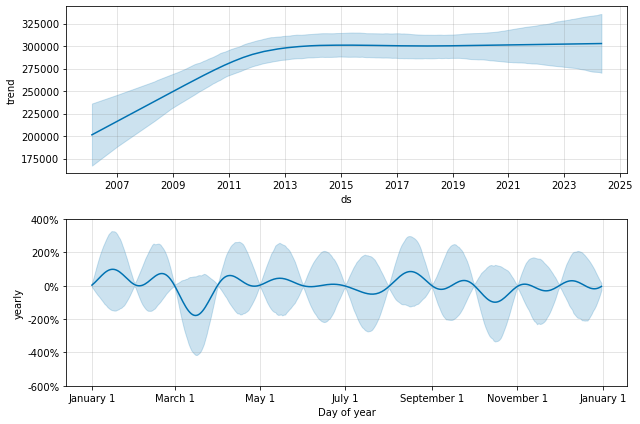

In [13]:
# instantiate the model and fit the timeseries
prophet = Prophet(seasonality_mode='multiplicative', mcmc_samples=300)
# yearly_seasonality = True,
# weekly_seasonality = True,
# daily_seasonality = True,
#changepoint_prior_scale = 0.1

prophet.fit(y)

# create a future data frame 
future = prophet.make_future_dataframe(periods=36, freq='MS')
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
# fig = prophet.plot(forecast)
fig = prophet.plot_components(forecast)
fig.savefig("new_taipei_city_1")

In [13]:
ax = fig.gca()
ax.set_title("新北市", size=25, fontproperties=ChineseFont1)
ax.set_xlabel("Year", size=12)
ax.set_ylabel("Price/Ping", size=12)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
fig.savefig("新北市", dpi=200, bbox_inches='tight')

In [14]:
# interactive plot 
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.express as px

fig1 = plot_plotly(prophet, forecast)
fig1.write_html("new_taipei_city.html")